# 3D diffusion
New to pynams? Check out the [intro and basic examples](https://github.com/EFerriss/Pynams/blob/master/EXAMPLES.ipynb), [peak fitting with pynams](https://github.com/EFerriss/Pynams/blob/master/EXAMPLES_peakfitting.ipynb), and [1D diffusion](https://github.com/EFerriss/Pynams/blob/master/EXAMPLES_diffusion1D.ipynbb)

## Setup

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats=["svg"]
from __future__ import print_function, division
import pynams
from pynams import Sample, Profile, styles, Block
from pynams.diffusion import models
import matplotlib.pyplot as plt

my_sample = Sample(length_a_microns=7000, 
                   length_b_microns=[2185, 2190, 2188, 2185, 2188],
                   length_c_microns=[1546, 1551, 1536, 1548, 1548],
                   IGSN='IEFERKUN4') # http://www.geosamples.org/


folder=''.join((pynams.example_FTIR_file_location, 'KunlunDiopside\\'))

# 3-dimensional diffusion models
## non-path integrated (3Dnpi) models
3-dimensional diffusion in a rectangular parallelepiped can be determined analytically simply by multiplying the 1D unit solutions together (Carslaw & Jaeger 1959 Section 6.4; Crank 1975 Section 2.5.1). 

'Non-path integrated' indicates that these are diffusion profiles assumed to go through the center of the sample, e.g., for a sample that has been polished into the center such that each measurement is assumed to have a constant concentration.

Required input:
* A list of the 3 lengths in each direction (if only 1, assumes a cube shape)
* A list of the 3 diffusivities in each direction (if only 1, assumes isotropic)
* Time

Output:
* figure and axes handles if plot3=True (default) and axes=None (default)
* the 3D matrix of concentrations throughout the crystal, v
* 2 lists of the x and y values across each profile, as plotted

Change the length of the x and y lists with keyword points (default=50)


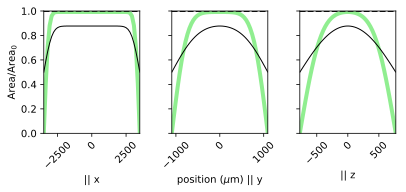

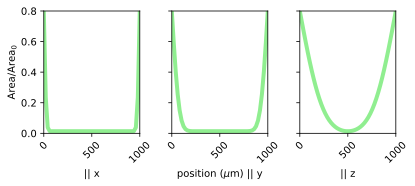

In [2]:
fig, axes, v, x, y = models.diffusion3Dnpi(lengths_microns=my_sample.lengths_microns, 
                                           log10Ds_m2s=-11, time_seconds=3600.)
v, x, y = models.diffusion3Dnpi(lengths_microns=my_sample.lengths_microns, final=0.5,
                                log10Ds_m2s=-10.5, time_seconds=3600., axes=axes,
                                styles3=[styles.style_1]*3)
models.diffusion3Dnpi(lengths_microns=1000., log10Ds_m2s=[-13., -12., -11.],
                      time_seconds=30*60, initial=0, final=0.8, ytop=0.8,
                      centered=False, show_line_at_initial=False);

## whole-block (3Dwb) models
'Whole-block' here indicates that the measurements include changes along the direction of the infrared ray path, i.e., the thickness direction. The calculations start out like 3Dnpi above and then account for the path integration.

Required input:
* A list of the 3 lengths in each direction (if only 1, assumes a cube shape)
* A list of the 3 diffusivities in each direction (if only 1, assumes isotropic)
* Time
* A list of the raypaths for each traverse

Output:
* figure and axes handles if plot3=True (default) and axes=None (default)
* 2 lists of the x and y values across each profile, as plotted

Other keywords and options are similar to 3Dnpi above.

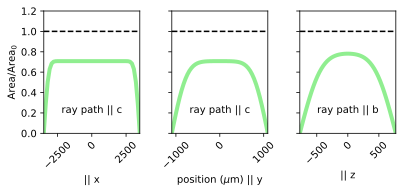

In [3]:
raypaths = ['c', 'c', 'b']
fig, ax, x, y = models.diffusion3Dwb(lengths_microns=my_sample.lengths_microns, 
                                     log10Ds_m2s=-11, time_seconds=3600.,
                                     raypaths=raypaths)
for idx, axis in enumerate(ax):
    axis.text(0, 0.2, ' '.join(('ray path ||', raypaths[idx])), ha='center')

## Blocks of data
A pynams Block is a group of exactly 3 orthogonal profiles. If you don't have all 3 orthogonal profiles, substitute placeholder profiles for the one(s) you're missing.

The 3 profiles must have directions = a, b, and c and raypaths (thickness directions) consistent with the sample, but
these directions don't necessarily have to correspond to the true crystallographic or optical axes.


In [4]:
# Example data in pynams folder
profile1 = Profile(profile_name = 'Kunlun diopside initial || a',
                   sample = my_sample, folder=folder,
                   direction = 'a', raypath = 'c',
                   fnames = ['K4q_adc05', 'K4q_bdcMID', 'K4q_adc65'],
                   positions_microns = [525., 3500., 6525.])

profile2 = Profile(profile_name = 'Kunlun diopside initial || b',
                   sample = my_sample, folder=folder,
                   direction = 'b', raypath = 'c', 
                   fnames = ['K4q_bdc01', 'K4q_bdcMID', 'K4q_bdc02'],
                   positions_microns = [120., 1094, 2067])

profile3 = Profile(profile_name = 'Kunlun diopside initial || c',
                   sample = my_sample, folder = folder, 
                   direction = 'c', raypath = 'b',
                   fnames = ['K4q_cdb01', 'K4q_cdbMID', 'K4q_cdb02', 'K4q_cdb03'],
                   positions_microns = [100., 773., 1454., 1326.])

dummy_profile = Profile(profile_name = 'Example when no data in 3rd direction',
                        sample = my_sample, direction='c', raypath='b', 
                        fnames=[], positions_microns=[])

my_first_block = Block(name = 'Kunlun diopside initial',
                       profiles = [profile1, profile2, dummy_profile])

### Plot areas for each profile in Block

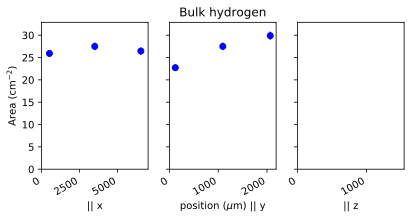

In [5]:
my_first_block.get_baselines(print_confirmation=False)
fig, list_of_axes = my_first_block.plot_areas_3panels()

### Plot 3Dnpi diffusion curves on top of block data
Default log10D_m2s = [-12, -12., -12]

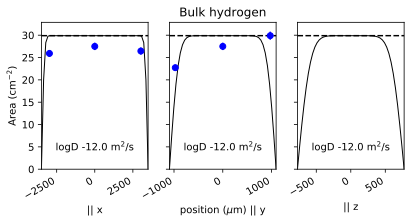

In [6]:
fig, list_of_axes = my_first_block.plot_diffusion(time_seconds=3*3600., labelDy=5)

## Issues
* Block.fitD() is broken
* get_peakfits and setting keyword peak_idx giving warnings but maybe working
* Here's some prep for whole-block profiles, which I'll get too later and don't want to delete yet

In [7]:
profile1 = Profile(profile_name = 'dehydrated Kunlun diopside || [100]',
                   sample = my_sample, direction = 'a', 
                   raypath='c',
                   folder = folder,
                   fnames = ['K4f_adc01', 'K4f_adc02', 'K4f_adc04',
                             'K4f_adc06', 'K4f_adc08', 'K4f_adc11',
                             'K4f_adc14', 'K4f_adc18', 'K4f_adc22',
                             'K4f_adc25', 'K4f_adc29', 'K4f_adc35',
                             'K4f_adc42', 'K4f_adc49', 'K4f_adc56',
                             'K4f_adc61', 'K4f_adc67', 'K4f_adc68'],
                   positions_microns = [100, 200, 400, 600, 800, 1100,
                                        1400, 1800, 2200, 2500, 2900, 3500, 
                                        4200, 4900, 5600, 6100,
                                        6700, 6800])

profile2 = Profile(profile_name = 'dehydrated Kunlun diopside || [010]',
                   sample = my_sample, direction = 'b', 
                   folder = folder, raypath='c',
                   fnames = ['K4f_bdc01', 'K4f_bdc02', 'K4f_bdc03', 
                             'K4f_bdc04', 'K4f_bdc05', 'K4f_bdc06', 
                             'K4f_bdc07', 'K4f_bdc08', 'K4f_bdc09', 
                             'K4f_bdc10', 'K4f_adc35', 'K4f_bdc15', 
                             'K4f_bdc17', 'K4f_bdc19', 'K4f_bdc21', 
                             'K4f_bdc22'],
                   positions_microns = [100., 200., 300., 400., 300., 600., 
                                        700., 800., 900., 1000., 1200., 1500., 
                                        1700., 1900., 2050, 2130])